In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 14
})

In [3]:
df = pd.read_csv("ufc-fighters-statistics.csv")
print("Loaded the file:", df.shape)
print("Missing values in each column are: \n", df.isnull().sum())
dupli = df.duplicated().sum()
print(f"We found {dupli} duplicate rows")
if dupli > 0:
    df = df.drop_duplicates()
    print(f"We have dropped {dupli} duplicate rows./n Now the new shape is: {df.shape}")
df.info()

Loaded the file: (4111, 18)
Missing values in each column are: 
 name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_

In [4]:
print("Missing values per column:",df.isnull().sum())
numeric = df.select_dtypes(include=['number']).columns
categorical = df.select_dtypes(include=['object']).columns
df[numeric] = df[numeric].fillna(df[numeric].median())
for col in categorical:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in categorical:
    df[col] = df[col].astype('category')

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)
print("Dataset after outlier clipping:")
print(df.info())
print("Statistics summary:")
print(df.describe())

Missing values per column: name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64
Datase

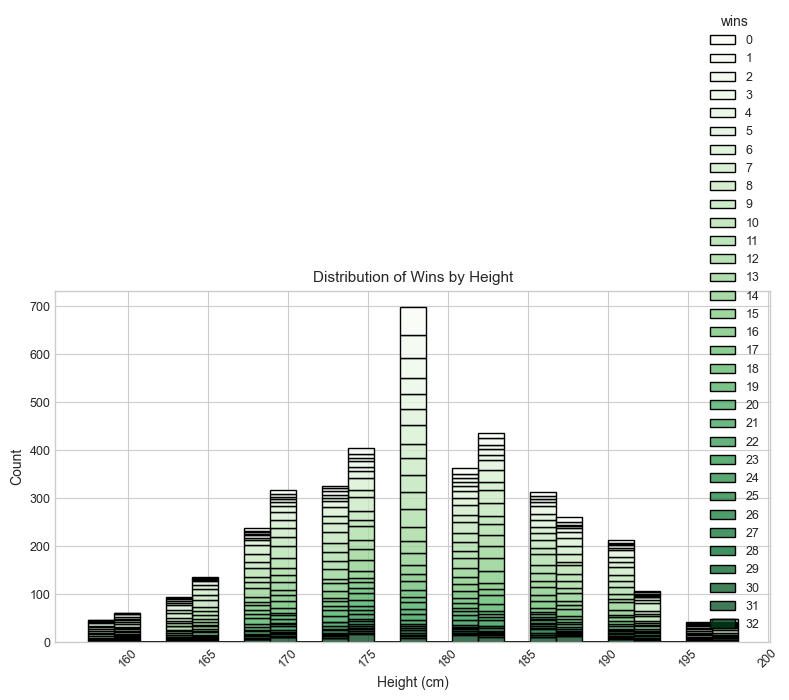

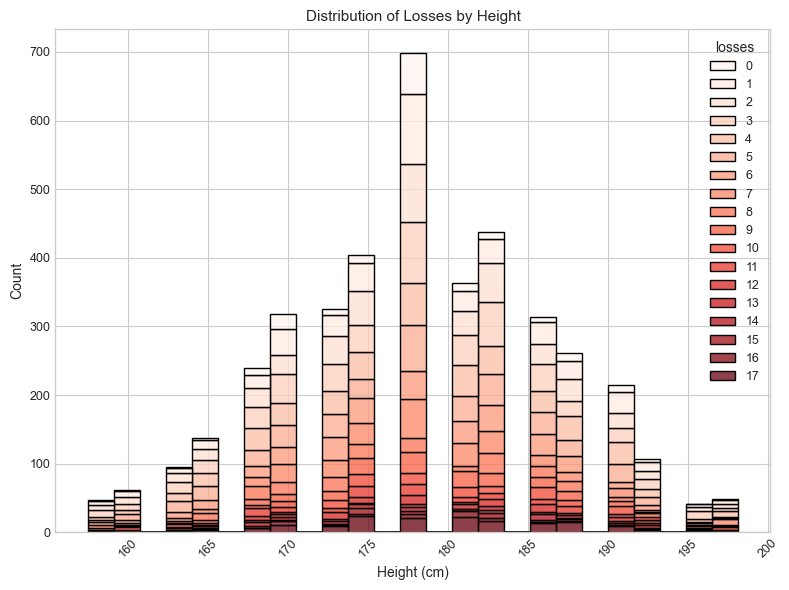

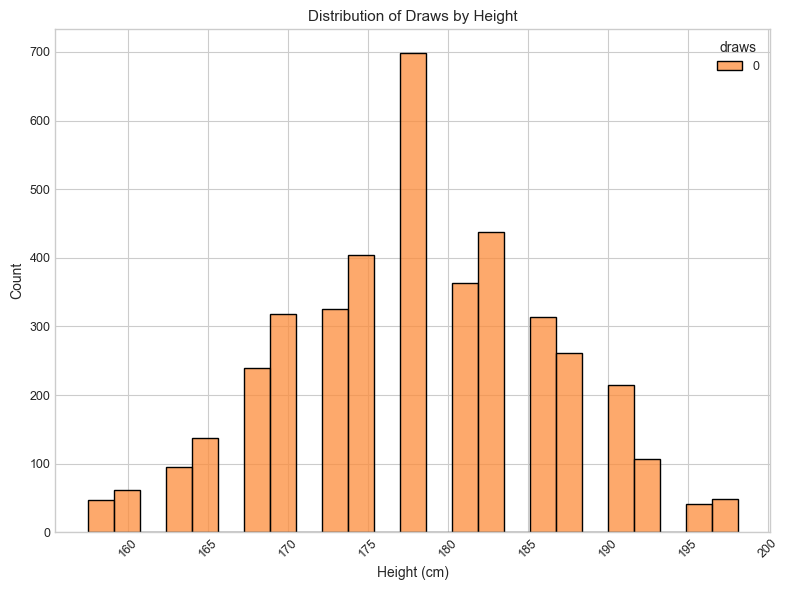

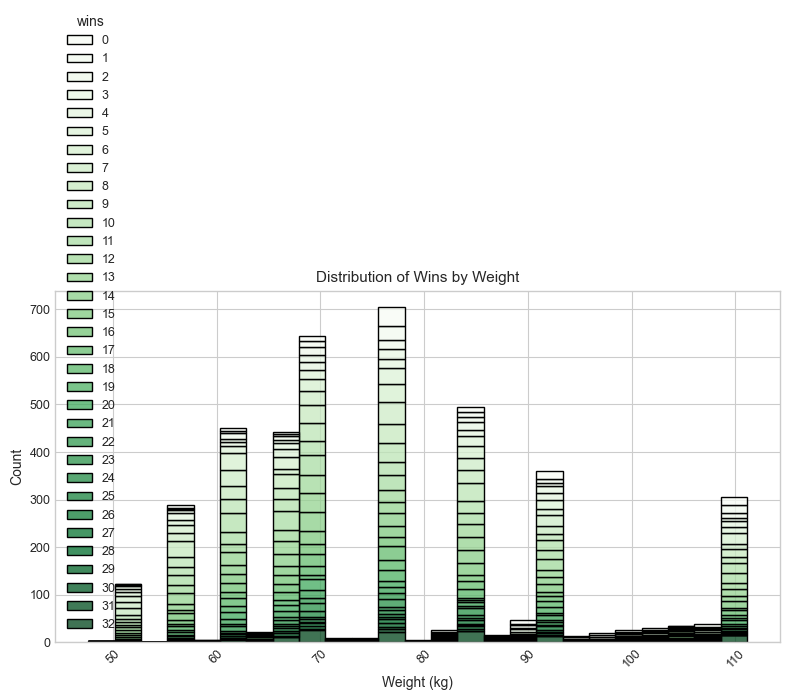

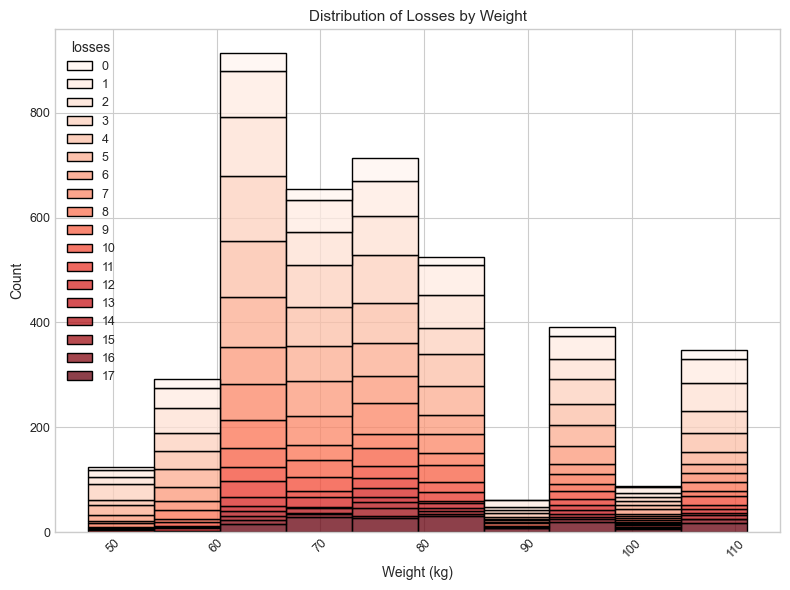

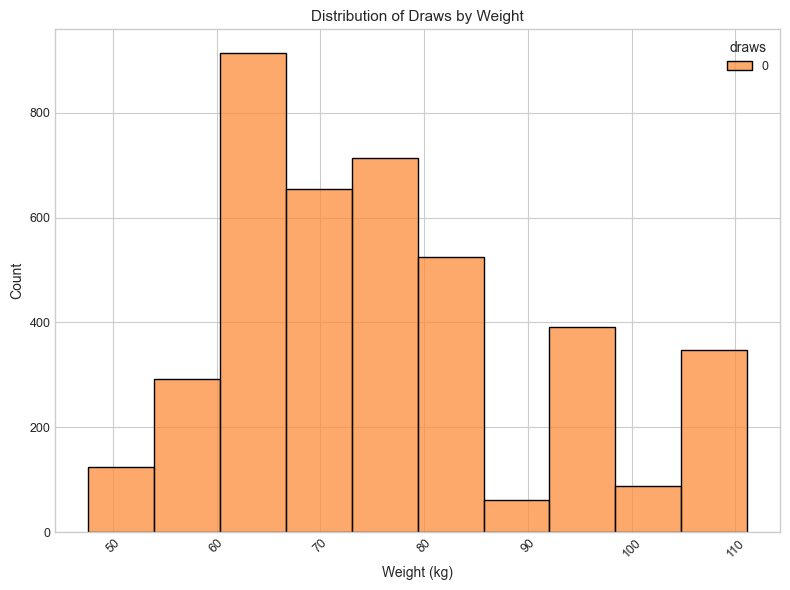

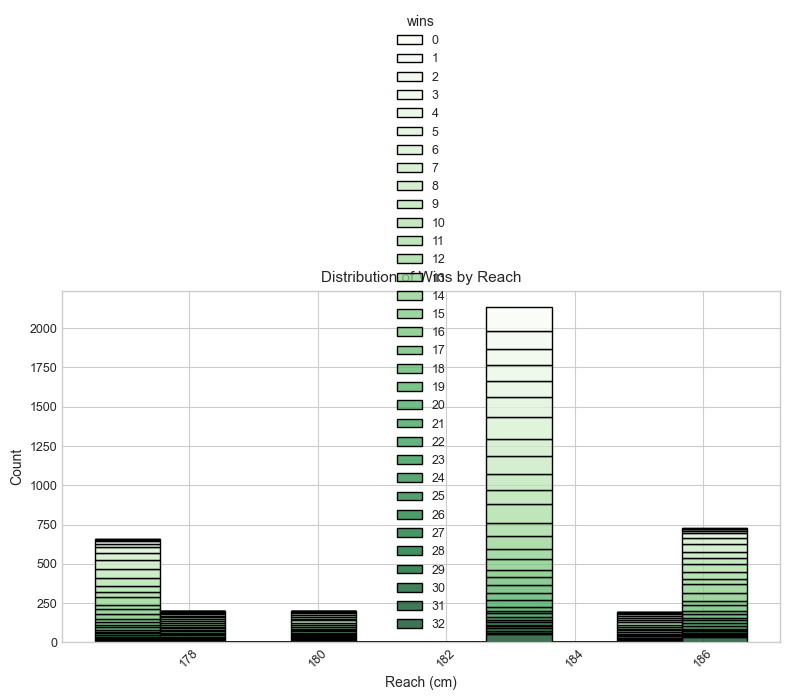

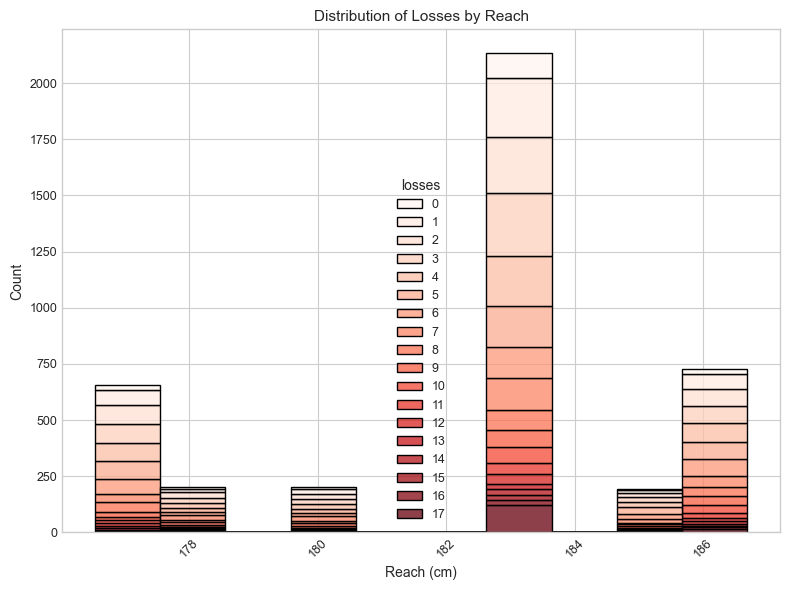

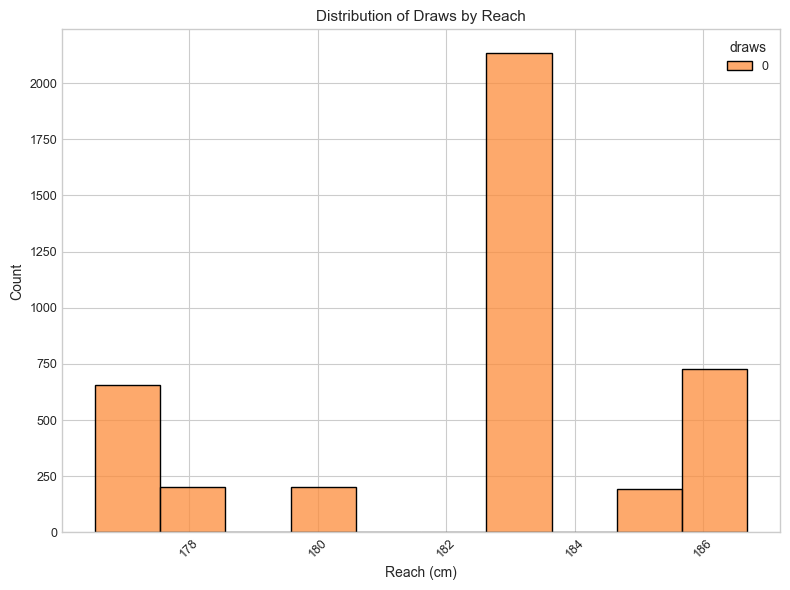

In [5]:
physical = ['height_cm', 'weight_in_kg', 'reach_in_cm']
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='height_cm', bins=25, hue='wins', multiple='stack', palette='Greens', edgecolor='black')
plt.title("Distribution of Wins by Height", fontsize=11)
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='height_cm', bins=25, hue='losses', multiple='stack', palette='Reds', edgecolor='black')
plt.title("Distribution of Losses by Height", fontsize=11)
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='height_cm', bins=25, hue='draws', multiple='stack', palette='Oranges', edgecolor='black')
plt.title("Distribution of Draws by Height", fontsize=11)
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='weight_in_kg', bins=25, hue='wins', multiple='stack', palette='Greens', edgecolor='black')
plt.title("Distribution of Wins by Weight", fontsize=11)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='weight_in_kg', bins=10, hue='losses', multiple='stack', palette='Reds', edgecolor='black')
plt.title("Distribution of Losses by Weight", fontsize=11)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='weight_in_kg', bins=10, hue='draws', multiple='stack', palette='Oranges', edgecolor='black')
plt.title("Distribution of Draws by Weight", fontsize=11)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='reach_in_cm', bins=10, hue='wins', multiple='stack', palette='Greens', edgecolor='black')
plt.title("Distribution of Wins by Reach", fontsize=11)
plt.xlabel("Reach (cm)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='reach_in_cm', bins=10, hue='losses', multiple='stack', palette='Reds', edgecolor='black')
plt.title("Distribution of Losses by Reach", fontsize=11)
plt.xlabel("Reach (cm)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='reach_in_cm', bins=10, hue='draws', multiple='stack', palette='Oranges', edgecolor='black')
plt.title("Distribution of Draws by Reach", fontsize=11)
plt.xlabel("Reach (cm)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
